## Importing libraries for regression analysis

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
pathk=r'/Users/keerthiputti/Downloads/Achievement 6/cancer incidents/02 Data/Prepared Data'

In [3]:
pathk

'/Users/keerthiputti/Downloads/Achievement 6/cancer incidents/02 Data/Prepared Data'

In [4]:
df_data=pd.read_csv(os.path.join(pathk,'2018_19_cancer_incidents.csv'),index_col=False)

In [5]:
df_data

,Leading Cancer Sites,States,Year,Age Groups,Gender,Gender Code,Count,Population,Crude Rate,Region,Age_Flag,Age_max
0,Brain and Other Nervous System,Alabama,2018,60-64 years,Female,F,23.0,168342.0,13.7,South,Middle age group,64.0
1,Brain and Other Nervous System,Alabama,2018,65-69 years,Female,F,21.0,145302.0,14.5,South,Elderly group,69.0
2,Brain and Other Nervous System,Alabama,2018,70-74 years,Female,F,23.0,117686.0,19.5,South,Elderly group,74.0
3,Brain and Other Nervous System,Alabama,2018,75-79 years,Female,F,19.0,84846.0,22.4,South,Elderly group,79.0
4,Brain and Other Nervous System,Alabama,2018,80-84 years,Female,F,18.0,58233.0,30.9,South,Elderly group,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24436,"Urinary Bladder, invasive and in situ",Wisconsin,2019,65-69 years,Female,F,41.0,173144.0,23.7,Mid-West,Elderly group,69.0
24437,"Urinary Bladder, invasive and in situ",Wisconsin,2019,70-74 years,Female,F,76.0,133024.0,57.1,Mid-West,Elderly group,74.0
24438,"Urinary Bladder, invasive and in situ",Wisconsin,2019,75-79 years,Female,F,69.0,94842.0,72.8,Mid-West,Elderly group,79.0
24439,"Urinary Bladder, invasive and in situ",Wisconsin,2019,80-84 years,Female,F,53.0,67245.0,78.8,Mid-West,Elderly group,84.0


## The data is already cleaned and ready to go. Hence question 1 through 3 is done.

## 4

Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

# Plotting my age_max with counts

In [6]:
df_data.corr()

,Year,Count,Population,Crude Rate,Age_max
Year,1.000000,0.002694,0.004080,-0.004010,0.003479
Count,0.002694,1.000000,0.207206,0.509539,0.089438
Population,0.004080,0.207206,1.000000,-0.271757,-0.460259
Crude Rate,-0.004010,0.509539,-0.271757,1.000000,0.366556
Age_max,0.003479,0.089438,-0.460259,0.366556,1.000000


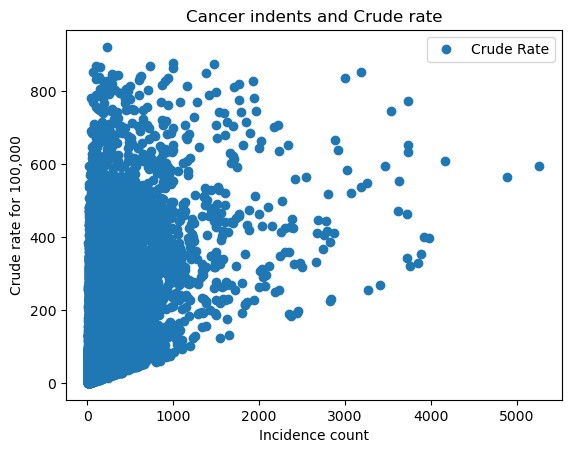

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_data.plot(x = 'Count', y='Crude Rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cancer indents and Crude rate')  
plt.xlabel('Incidence count')  
plt.ylabel('Crude rate for 100,000')  
plt.show()

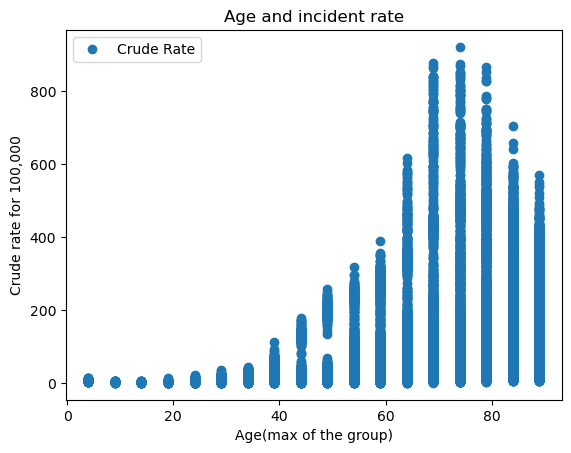

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_data.plot(x = 'Age_max', y='Crude Rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age and incident rate')  
plt.xlabel('Age(max of the group)')  
plt.ylabel('Crude rate for 100,000')  
plt.show()

## 5 
State your hypothesis in a markdown cell within your Jupyter notebook.

## My hypothesis is Crude rate increases with count

## 6
Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_data['Age_max'].values.reshape(-1,1)
y = df_data['Crude Rate'].values.reshape(-1,1)

In [13]:
X

array([[64.],
       [69.],
       [74.],
       ...,
       [79.],
       [84.],
       [89.]])

In [14]:
y

array([[13.7],
       [14.5],
       [19.5],
       ...,
       [72.8],
       [78.8],
       [84.1]])

## 7
Split the data into two sets: a training set and a test set.

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 8
Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.

In [16]:
# Create a regression object.

regression = LinearRegression() 

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 9
Create a plot that shows the regression line on the test set.


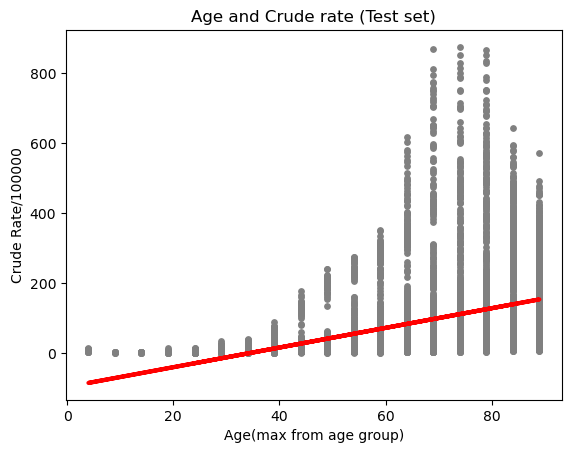

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age and Crude rate (Test set)')
plot_test.xlabel('Age(max from age group)')
plot_test.ylabel('Crude Rate/100000')
plot_test.show()

# 10
Write your own interpretation of how well the line appears to fit the data in a markdown cell.

 My interpretation is the model fits almost good. but this is not the best fit as the slope is more slant than expected

## 11
Check the model performance statistics—MSE and R2.


In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.80311367]]
Mean squared error:  14063.624701003253
R2 score:  0.1343217825415527


## 12
Compare the predicted y values with the actual y values in a dataframe.


In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data_act_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_act_pred.head(30)

,Actual,Predicted
0,642.3,139.870168
1,57.2,55.776758
2,379.5,83.807894
3,240.0,153.885736
4,159.4,55.776758
5,51.5,97.823463
6,39.2,55.776758
7,74.4,83.807894
8,19.8,83.807894
9,28.4,83.807894


## 13
Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

The prediction model was a good understading however, the data set and prediction model are suitable for each other. The vulnarebility of having cancer increases with age but its not very linear in nature. the vulnarability starts around age 40 mark and increases. Hence the pridctions are not inline with actual values.
Also, we can see . For the actual vs predcted data, MSE is too high and R2 is too low. Hence we can understand that regresson model is suitable for these variables.

In [23]:
#exporting data with age_max
df_data.to_csv(os.path.join(pathk,'Cancer_incidents_1819.csv'),index=False)